<a href="https://colab.research.google.com/github/rallyfranky/my-first-repo/blob/main/%E3%83%99%E3%82%A4%E3%82%BA%E3%81%AE%E8%A8%93%E7%B7%B4%EF%BC%A0%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpyro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 KB 5.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist

In [3]:
#データの可視化
iris_dataset = sns.load_dataset('iris')

#データ数
N = 50

iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
#setonaとversicolorのみ抽出
iris_dataset_2species = iris_dataset[iris_dataset['species'].isin(['setosa','versicolor'])].copy()
iris_dataset_2species

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [5]:
iris_dataset_use = iris_dataset_2species.sample(N, random_state=1)
iris_dataset_use

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,versicolor
84,5.4,3.0,4.5,1.5,versicolor
33,5.5,4.2,1.4,0.2,setosa
81,5.5,2.4,3.7,1.0,versicolor
93,5.0,2.3,3.3,1.0,versicolor
17,5.1,3.5,1.4,0.3,setosa
36,5.5,3.5,1.3,0.2,setosa
82,5.8,2.7,3.9,1.2,versicolor
69,5.6,2.5,3.9,1.1,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [6]:
x_data = iris_dataset_use[['sepal_length','sepal_width']].copy().values

In [7]:
x_data_add_bias = np.concatenate([x_data,np.ones((N,1))],axis=1)

In [8]:
y_data = pd.Categorical(iris_dataset_use['species']).codes

In [9]:
x_data_set = x_data[y_data==0]
x_data_ves = x_data[y_data==1]

In [19]:
x_data_add_bias

array([[5.5, 2.4, 1. ],
       [5.4, 3. , 1. ],
       [5.5, 4.2, 1. ],
       [5.5, 2.4, 1. ],
       [5. , 2.3, 1. ],
       [5.1, 3.5, 1. ],
       [5.5, 3.5, 1. ],
       [5.8, 2.7, 1. ],
       [5.6, 2.5, 1. ],
       [6.7, 3.1, 1. ],
       [5.8, 2.6, 1. ],
       [5.1, 3.4, 1. ],
       [6.3, 3.3, 1. ],
       [6.9, 3.1, 1. ],
       [6.4, 3.2, 1. ],
       [5.2, 4.1, 1. ],
       [5.4, 3.4, 1. ],
       [5.1, 3.8, 1. ],
       [6. , 2.9, 1. ],
       [5.4, 3.7, 1. ],
       [4.7, 3.2, 1. ],
       [6.1, 2.8, 1. ],
       [6.2, 2.9, 1. ],
       [6. , 2.2, 1. ],
       [5.1, 3.8, 1. ],
       [5. , 3.2, 1. ],
       [5.6, 2.7, 1. ],
       [5.2, 3.5, 1. ],
       [5.1, 3.8, 1. ],
       [4.4, 3. , 1. ],
       [5.8, 2.7, 1. ],
       [5.7, 2.8, 1. ],
       [6.5, 2.8, 1. ],
       [5.7, 3. , 1. ],
       [5.6, 3. , 1. ],
       [5. , 3.5, 1. ],
       [5.3, 3.7, 1. ],
       [5.2, 2.7, 1. ],
       [5.1, 3.3, 1. ],
       [4.9, 3.1, 1. ],
       [6.7, 3.1, 1. ],
       [5.5, 2.3

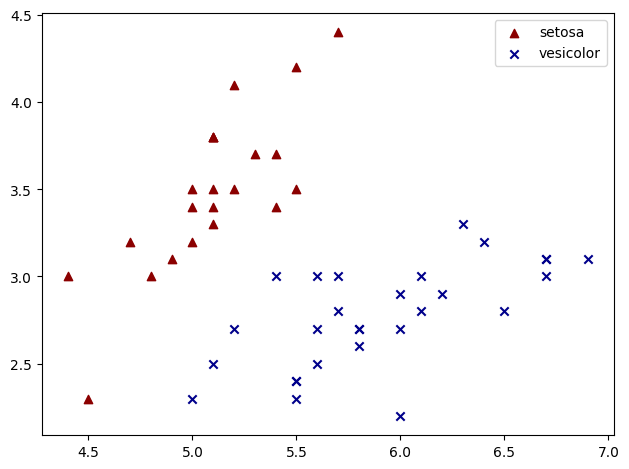

In [11]:
plt.scatter(x=x_data_set[:,0],y=x_data_set[:,1],color='darkred', marker='^',label='setosa')
plt.scatter(x_data_ves[:,0],x_data_ves[:,1],color='darkblue', marker='x',label='vesicolor')
plt.legend()
plt.tight_layout()

In [12]:
x_data[:,0]

array([5.5, 5.4, 5.5, 5.5, 5. , 5.1, 5.5, 5.8, 5.6, 6.7, 5.8, 5.1, 6.3,
       6.9, 6.4, 5.2, 5.4, 5.1, 6. , 5.4, 4.7, 6.1, 6.2, 6. , 5.1, 5. ,
       5.6, 5.2, 5.1, 4.4, 5.8, 5.7, 6.5, 5.7, 5.6, 5. , 5.3, 5.2, 5.1,
       4.9, 6.7, 5.5, 6.7, 5.7, 6. , 4.5, 4.8, 6.1, 5. , 5.1])

In [23]:
# y=axi+bxii+c
def model(x,y=None):
  w = numpyro.sample('a',dist.Normal(0,1),sample_shape=(x.shape[1],))
  pm_y = numpyro.sample('pm_y',dist.Bernoulli(logits=w.dot(x.T)),obs=y_data)
  return pm_y

In [24]:
kernel = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(kernel, num_samples=4000, num_warmup=2000)
mcmc.run(jax.random.PRNGKey(0),x=x_data_add_bias,y=y_data)

sample: 100%|██████████| 6000/6000 [00:05<00:00, 1078.87it/s, 15 steps of size 1.45e-01. acc. prob=0.94]


In [25]:
import arviz as ar

In [26]:
ar.summary(mcmc)

Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],1.721,0.344,1.083,2.362,0.010,0.007,1263.0,1424.0,NaN
a[1],-2.868,0.575,-3.961,-1.824,0.015,0.011,1394.0,1634.0,NaN
a[2],-0.301,0.972,-2.184,1.490,0.024,0.022,1632.0,1052.0,NaN


array([[<Axes: title={'center': 'a\n0'}>,
        <Axes: title={'center': 'a\n0'}>],
       [<Axes: title={'center': 'a\n1'}>,
        <Axes: title={'center': 'a\n1'}>],
       [<Axes: title={'center': 'a\n2'}>,
        <Axes: title={'center': 'a\n2'}>]], dtype=object)

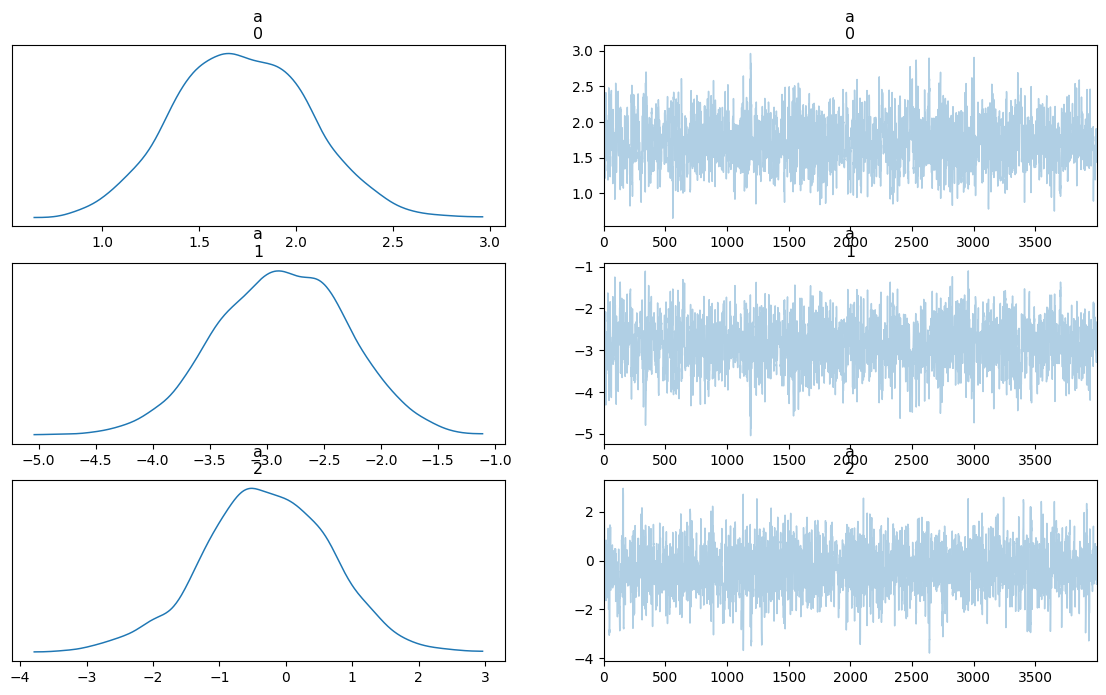

In [27]:
ar.plot_trace(mcmc,compact=False,figsize=(14,8))

In [36]:
mcmc_samples = mcmc.get_samples()

w1 = mcmc_samples['a'][:,0]
w2 = mcmc_samples['a'][:,1]
w3 = mcmc_samples['a'][:,2]

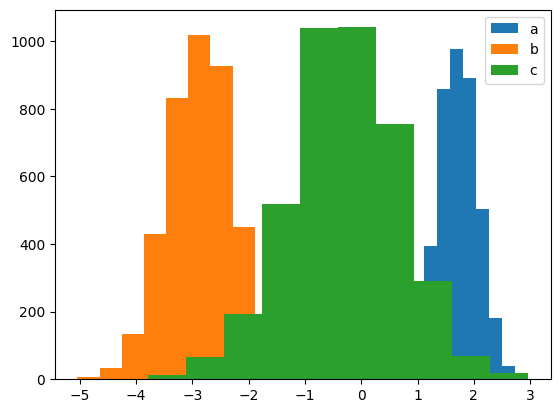

In [37]:
plt.hist(w1,label='a')
plt.hist(w2,label='b')
plt.hist(w3,label='c')
plt.legend()

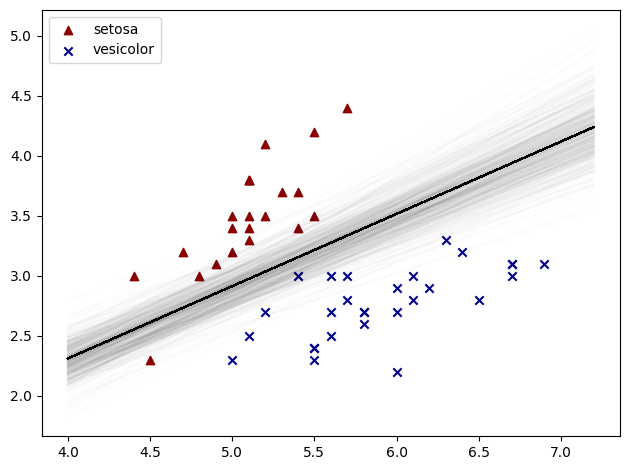

In [38]:
x1 = np.linspace(4.0,7.2,10)
for i in range(0,9000,10):
  x2 = - w3[i] / w2[i] - w1[i] / w2[i] * x1
  plt.plot(x1, x2, alpha=0.01, color='black')

plt.scatter(x=x_data_set[:,0],y=x_data_set[:,1],color='darkred', marker='^',label='setosa')
plt.scatter(x_data_ves[:,0],x_data_ves[:,1],color='darkblue', marker='x',label='vesicolor')



plt.legend()
plt.tight_layout()